In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns

In [3]:
PATH = "../Dados/"
FILE = "contagem_faturado_consumo_armarios_por_ano_mes.txt"

## Contagem de armários ativos mensais/anuais

In [3]:
armarios = pd.read_csv(PATH + FILE, sep = '\t')

In [4]:
armarios['contagem'].dtype

dtype('int64')

In [5]:
armarios = armarios.sort_values(by = 'mes')
armarios

,contagem,faturado,consumo,mes
59,1,10.33,30.00,201202
88,2,414.85,0.00,201203
0,1,11.93,0.00,201204
29,1,11.92,0.00,201205
60,1,12.02,0.00,201206
...,...,...,...,...
116,4325,5380065.92,5380344.68,202203
28,4239,4781780.14,5012065.00,202204
58,4063,3910494.05,4757331.66,202205
87,3687,3540237.57,4345552.18,202206


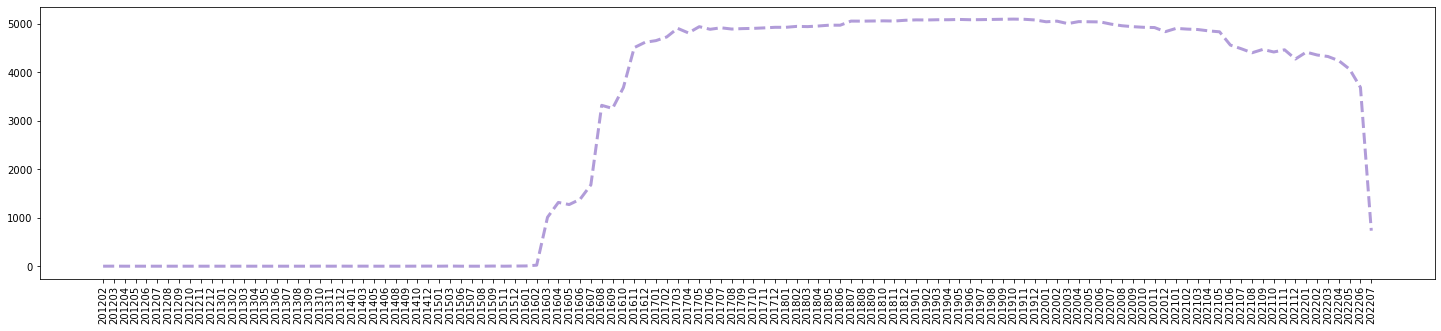

In [74]:
df = armarios.copy()
df['mes'] = df['mes'].astype('string')
df = df.set_index('mes')

plt.figure(figsize=(25, 5))

plt.xticks(rotation=90)

plt.plot(df.index, df['contagem'], linestyle= "--", color='#b19cd9', alpha=1., linewidth=3, label = 'Saldo')


plt.show()

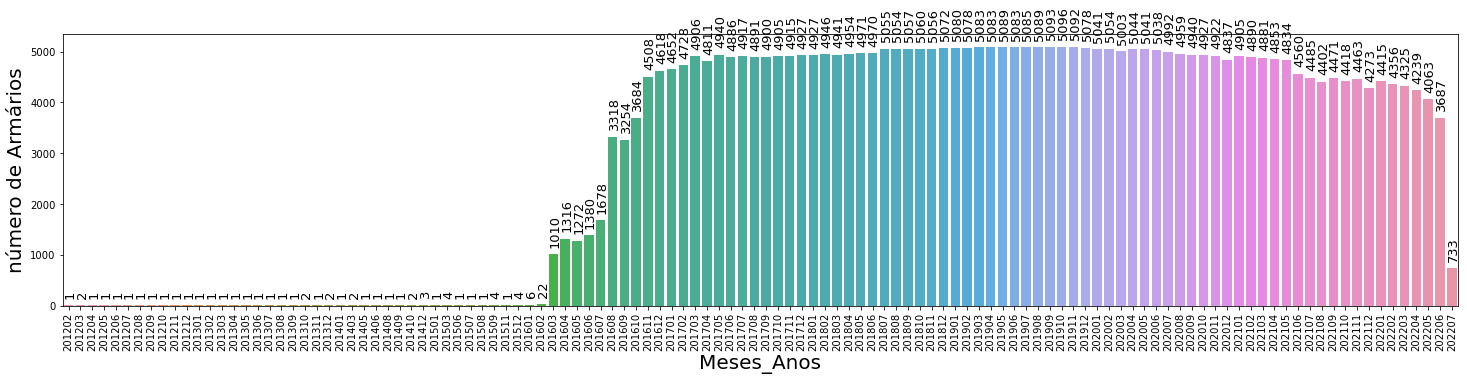

In [6]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = 'contagem', data = armarios)

plt.xticks(rotation=90)

#plt.plot(df.index, df['contagem'], linestyle= "--", color='#b19cd9', alpha=1., linewidth=3, label = 'Saldo')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+200), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='número de Armários')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [8]:
melhores_meses = armarios.iloc[51:,]

In [9]:
melhores_meses

,contagem,faturado,consumo,mes
42,4652,4972872.82,7352225.15,201701
71,4728,5089089.93,7822296.52,201702
101,4906,5713679.80,9713763.40,201703
13,4811,5321985.35,7850218.72,201704
43,4940,5535952.94,12720018.42,201705
...,...,...,...,...
116,4325,5380065.92,5380344.68,202203
28,4239,4781780.14,5012065.00,202204
58,4063,3910494.05,4757331.66,202205
87,3687,3540237.57,4345552.18,202206


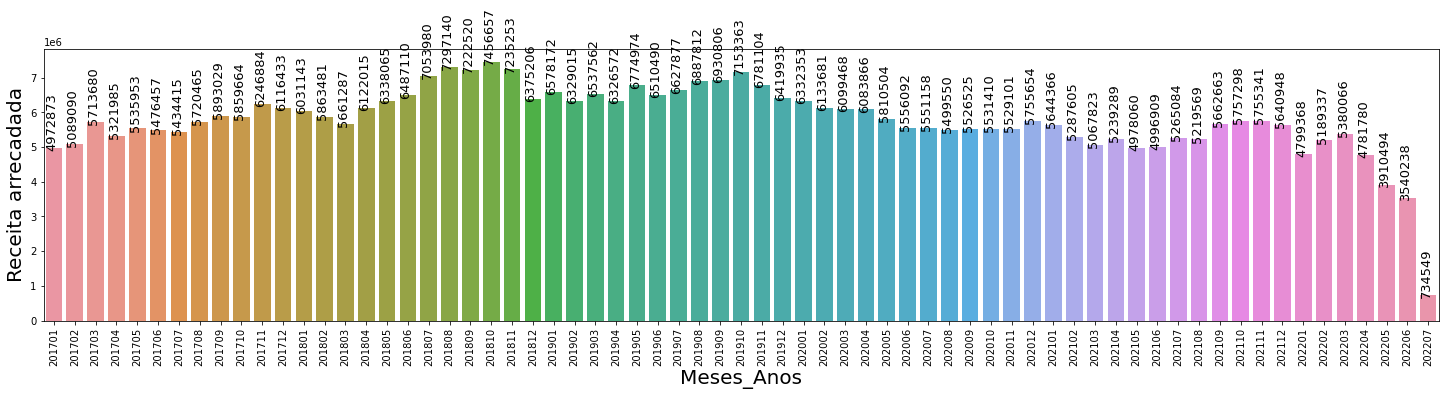

In [79]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = 'faturado', data = melhores_meses)

plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Receita arrecadada')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

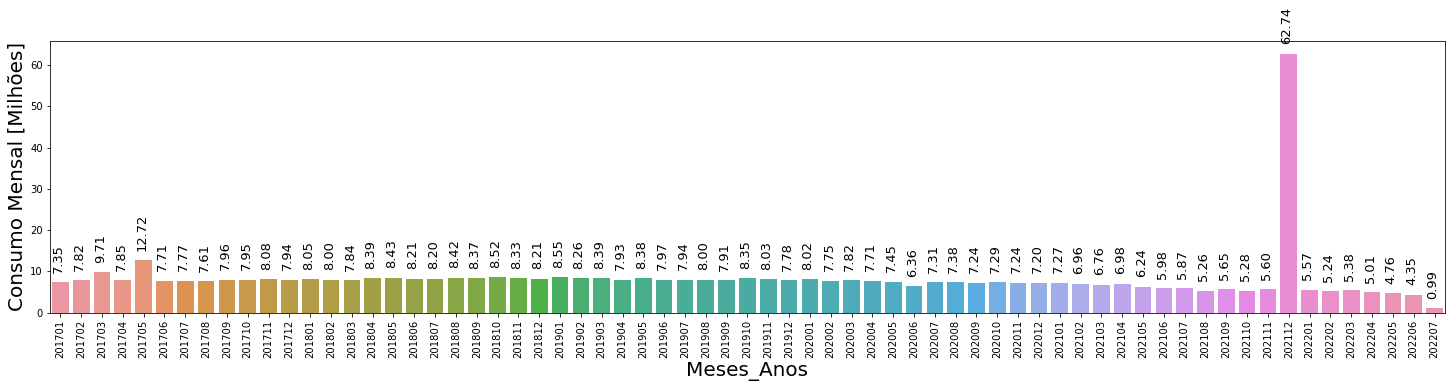

In [16]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = melhores_meses['consumo']/1000000, data = melhores_meses)

plt.xticks(rotation=90)


for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height() + 3), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Consumo Mensal [Milhões]')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

In [17]:
armarios_corrigido = pd.read_csv(PATH + 'contagem_faturado_consumo_armarios_por_ano_mes_removido_faturas_problematicas.txt', sep = '\t')

In [18]:
melhores_meses_corrigido = armarios_corrigido.iloc[51:-2,]
melhores_meses_corrigido

,contagem,faturado,consumo,mes
51,4649,4936866.55,7282178.15,201701
52,4725,5056587.45,7759503.52,201702
53,4903,5672340.11,8109782.40,201703
54,4808,5287719.95,7784316.72,201704
55,4937,5496759.74,7955040.42,201705
...,...,...,...,...
111,4413,4799130.21,5540832.49,202201
112,4353,5137040.49,5179923.60,202202
113,4322,5320936.17,5318555.17,202203
114,4236,4735405.06,4956208.99,202204


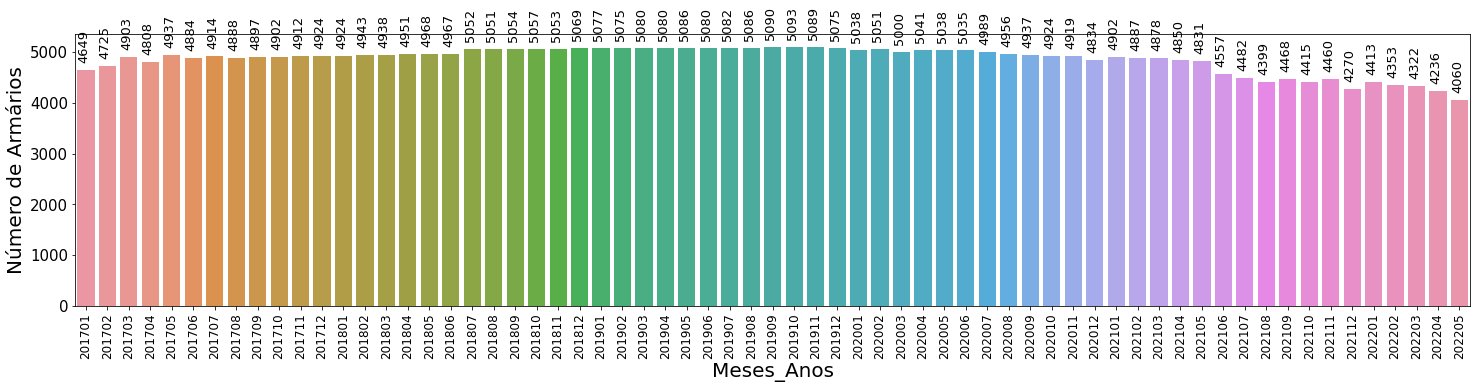

In [19]:
plt.figure(figsize=(25, 5))
#ax = sns.barplot(x=armarios['mes'], y=(armarios['contagem']))
ax = sns.barplot(x = 'mes', y = 'contagem', data = melhores_meses_corrigido)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+200), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Número de Armários')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

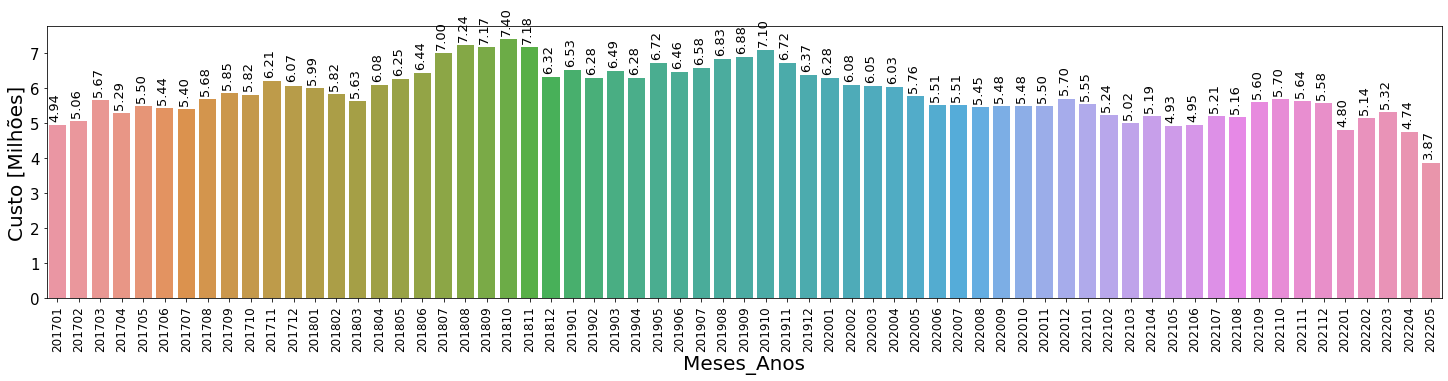

In [21]:
plt.figure(figsize=(25, 5))

ax = sns.barplot(x = 'mes', y = melhores_meses_corrigido['faturado']/1000000, data = melhores_meses_corrigido)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)


for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.2), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Custo [Milhões]')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

plt.show()

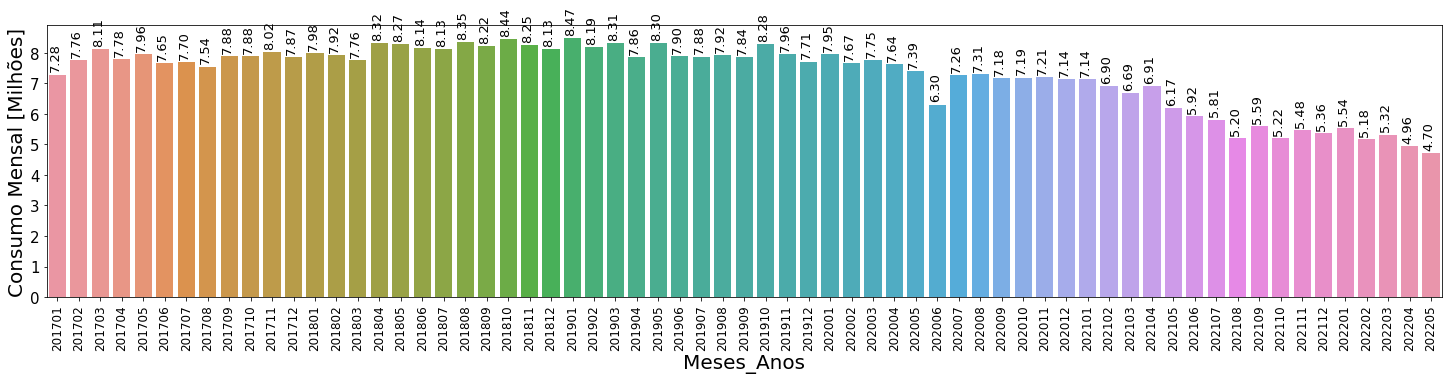

In [22]:
plt.figure(figsize=(25, 5))

ax = sns.barplot(x = 'mes', y = melhores_meses_corrigido['consumo']/1000000, data = melhores_meses_corrigido)

plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)


for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+0.2), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Meses_Anos', ylabel='Consumo Mensal [Milhões]')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)



plt.show()

In [24]:
estados_armarios = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202205.txt', sep = '\t')
estados_armarios.columns

Index(['contagem', 'faturado', 'consumo', 'mes', 'uf', 'Macroregiao'], dtype='object')

In [25]:
total = int(sum(estados_armarios['contagem']))
total

4063

In [26]:
estados_armarios.sort_values(by='Macroregiao')

,contagem,faturado,consumo,mes,uf,Macroregiao
10,229,54287.22,44871.00,202205,DF,CO
2,78,16034.58,77339.00,202205,MT,CO
14,119,166297.42,208027.39,202205,MS,CO
12,9,17709.51,19304.03,202205,GO,CO
5,1,88.54,100.00,202205,RO,N
8,1,2063.19,1776.00,202205,AM,N
18,33,43060.96,50257.90,202205,RN,NE
15,75,75133.37,81402.00,202205,PB,NE
9,57,83428.25,69064.00,202205,CE,NE
0,65,69398.31,59132.00,202205,AL,NE


In [27]:
estados_armarios = estados_armarios.sort_values(by=['Macroregiao', 'contagem'])
estados_armarios

,contagem,faturado,consumo,mes,uf,Macroregiao
12,9,17709.51,19304.03,202205,GO,CO
2,78,16034.58,77339.00,202205,MT,CO
14,119,166297.42,208027.39,202205,MS,CO
10,229,54287.22,44871.00,202205,DF,CO
5,1,88.54,100.00,202205,RO,N
8,1,2063.19,1776.00,202205,AM,N
4,4,7000.97,7227.00,202205,PI,NE
3,14,14684.69,20120.00,202205,PE,NE
18,33,43060.96,50257.90,202205,RN,NE
20,47,53201.84,48993.00,202205,SE,NE


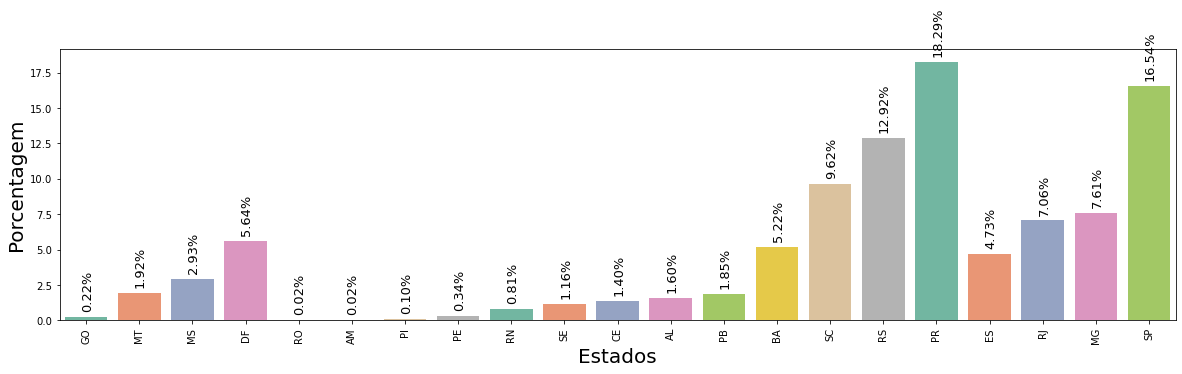

In [91]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=estados_armarios['uf'], y=(estados_armarios['contagem']/total)*100, data = estados_armarios, palette='Set2')

plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + 0.3, p.get_height()+0.6), rotation = 90, fontsize = 13)
    
ax.set(xlabel='Estados', ylabel='Porcentagem')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
plt.show()

In [36]:
teste = estados_armarios[['Macroregiao','contagem']]
teste['porcentagem'] = (estados_armarios['contagem']/total)*100
round(teste.groupby('Macroregiao')['porcentagem'].sum(),2)

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_6660/4236964664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['porcentagem'] = (estados_armarios['contagem']/total)*100


Macroregiao
CO    10.71
N      0.05
NE    12.48
S     40.83
SE    35.93
Name: porcentagem, dtype: float64

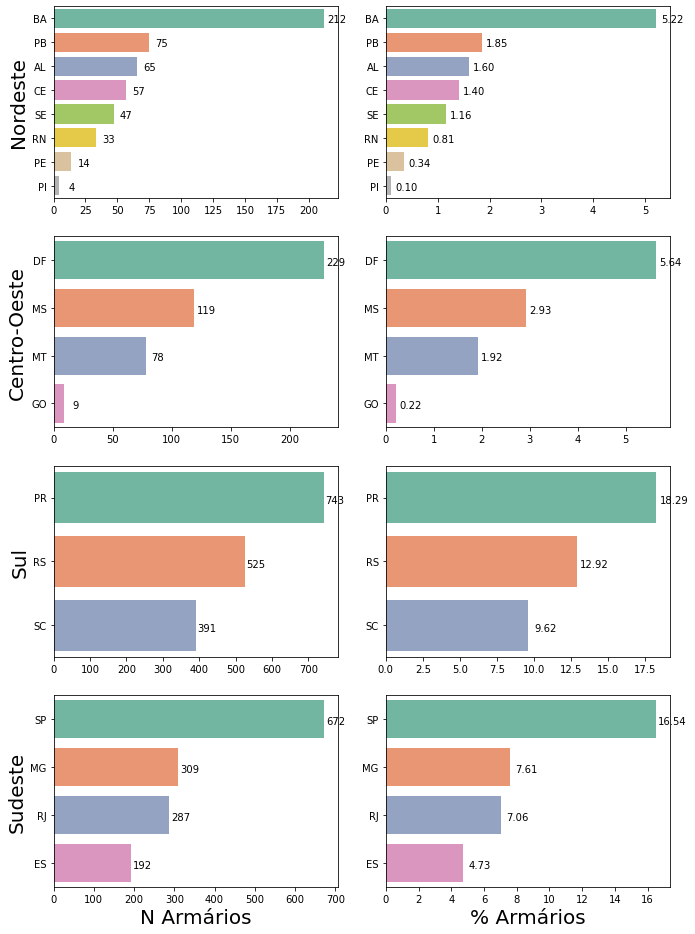

In [41]:
fig = plt.figure(figsize=(17,50))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")



#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 3, 4)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 5)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")


#### Sul

#### Fig A
plot = plt.subplot(12, 3, 7)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 8)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 3, 10)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 11)

ax = sns.barplot(
    x=(estados_armarios['contagem']/total)*100, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.xaxis.label.set_size(20)


del ax

In [90]:
estados_armarios['contagem']

,contagem,faturado,consumo,mes,uf,Macroregiao
12,9,17709.51,19304.03,202205,GO,CO
2,78,16034.58,77339.00,202205,MT,CO
14,119,166297.42,208027.39,202205,MS,CO
10,229,54287.22,44871.00,202205,DF,CO
5,1,88.54,100.00,202205,RO,N
8,1,2063.19,1776.00,202205,AM,N
4,4,7000.97,7227.00,202205,PI,NE
3,14,14684.69,20120.00,202205,PE,NE
18,33,43060.96,50257.90,202205,RN,NE
20,47,53201.84,48993.00,202205,SE,NE


In [91]:
round(estados_armarios.groupby('Macroregiao')['contagem'].sum(),2)

Macroregiao
CO     435
N        2
NE     507
S     1659
SE    1460
Name: contagem, dtype: int64

In [92]:
round(estados_armarios.groupby('Macroregiao')['consumo'].sum(),2)

Macroregiao
CO     349541.42
N        1876.00
NE     616932.90
S     2263876.05
SE    1525105.29
Name: consumo, dtype: float64

In [93]:
round(estados_armarios.groupby('Macroregiao')['faturado'].sum(),2)

Macroregiao
CO     254328.73
N        2151.73
NE     692414.53
S     1903713.60
SE    1057885.46
Name: faturado, dtype: float64

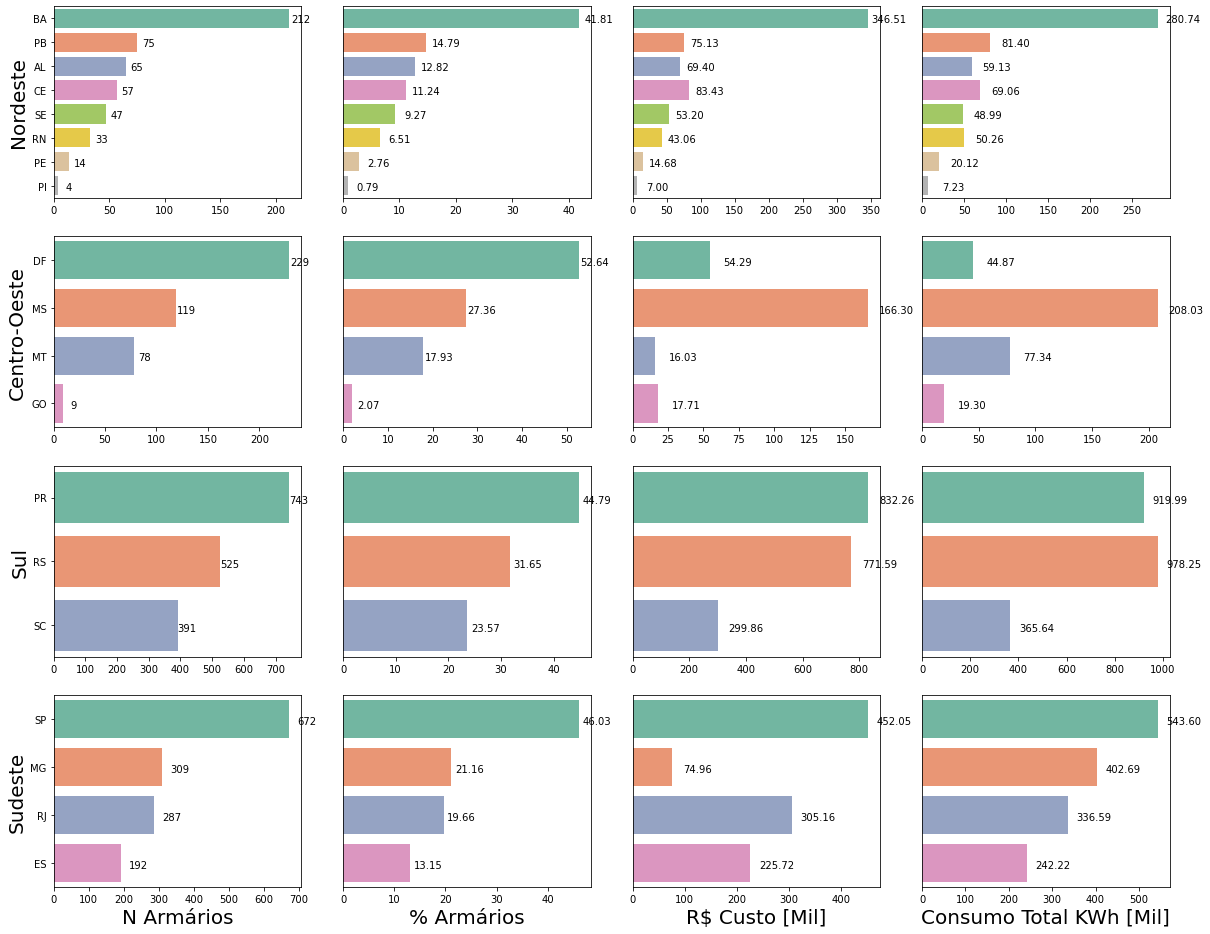

In [44]:
fig = plt.figure(figsize=(20,50))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['Macroregiao'] == 'NE']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig C
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=estados_armarios['faturado']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 4)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)



#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['Macroregiao'] == 'CO']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=estados_armarios['faturado']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 8)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['Macroregiao'] == 'S']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
    

    
#### Fig C
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=estados_armarios['faturado']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(100+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)


#### Fig D
plot = plt.subplot(12, 4, 12)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(110+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=(estados_armarios['contagem']/sum(estados_armarios['contagem'].loc[estados_armarios['Macroregiao'] == 'SE']) * 100), 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(3.5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=estados_armarios['faturado']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(50+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Custo [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


#### Fig D
plot = plt.subplot(12, 4, 16)

ax = sns.barplot(
    x=estados_armarios['consumo']/1000, 
    y='uf', 
    data=estados_armarios.loc[estados_armarios['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(60+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)


del ax


plt.show()

In [86]:
estados_armarios.loc[estados_armarios['Macroregiao'] == 'NE']

,contagem,faturado,consumo,mes,uf,Macroregiao
0,65,69398.31,59132.0,202205,AL,NE
1,212,346506.14,280737.0,202205,BA,NE
3,14,14684.69,20120.0,202205,PE,NE
4,4,7000.97,7227.0,202205,PI,NE
9,57,83428.25,69064.0,202205,CE,NE
15,75,75133.37,81402.0,202205,PB,NE
18,33,43060.96,50257.9,202205,RN,NE
20,47,53201.84,48993.0,202205,SE,NE


In [45]:
estados_armarios_03 = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202203.txt', sep = '\t')
estados_armarios_04 = pd.read_csv(PATH + 'contagem_faturado_consumo_estados_202204.txt', sep = '\t')

In [46]:
total = int(sum(estados_armarios_03['contagem']))
total

4325

In [47]:
total = int(sum(estados_armarios_04['contagem']))
total

4239

In [48]:
estados_armarios_03 = estados_armarios_03.sort_values(by=['Macroregiao', 'contagem'])
estados_armarios_04 = estados_armarios_04.sort_values(by=['Macroregiao', 'contagem'])

In [49]:
df = estados_armarios.merge(estados_armarios_03, on= ['uf', 'Macroregiao'])
df2 = df.merge(estados_armarios_04, on= ['uf', 'Macroregiao'])
df2

,contagem_x,faturado_x,consumo_x,mes_x,uf,Macroregiao,contagem_y,faturado_y,consumo_y,mes_y,contagem,faturado,consumo,mes
0,9,17709.51,19304.03,202205,GO,CO,7,17868.20,17157.78,202203,8,14013.80,16152.00,202204
1,78,16034.58,77339.00,202205,MT,CO,81,15402.43,80502.00,202203,81,14378.31,80453.00,202204
2,119,166297.42,208027.39,202205,MS,CO,124,170864.80,215186.00,202203,124,173619.68,219890.54,202204
3,229,54287.22,44871.00,202205,DF,CO,239,76889.90,61986.00,202203,237,58939.38,40815.00,202204
4,1,2063.19,1776.00,202205,AM,N,1,2278.41,1680.00,202203,1,2414.34,1882.00,202204
5,4,7000.97,7227.00,202205,PI,NE,4,9515.05,8085.00,202203,4,8252.65,7181.00,202204
6,14,14684.69,20120.00,202205,PE,NE,17,21917.49,25539.00,202203,18,14291.80,22915.00,202204
7,33,43060.96,50257.90,202205,RN,NE,45,69502.38,71886.37,202203,38,65386.39,69576.63,202204
8,47,53201.84,48993.00,202205,SE,NE,51,66601.54,57396.00,202203,50,61491.68,54582.00,202204
9,57,83428.25,69064.00,202205,CE,NE,181,288792.57,227631.00,202203,138,215116.93,170563.00,202204


In [124]:
df2.to_csv(PATH + 'dados_ajeitar.txt', index=False)

In [50]:
df = pd.read_csv(PATH + 'dados_ajeitar.txt', sep = '\t')
df.columns

Index(['contagem', 'faturado', 'consumo', 'mês', 'uf', 'Macroregiao'], dtype='object')

In [52]:
df

,contagem,faturado,consumo,mês,uf,Macroregiao
0,9,17709.51,19304.03,202205,GO,CO
1,78,16034.58,77339.00,202205,MT,CO
2,119,166297.42,208027.39,202205,MS,CO
3,229,54287.22,44871.00,202205,DF,CO
4,1,2063.19,1776.00,202205,AM,N
5,4,7000.97,7227.00,202205,PI,NE
6,14,14684.69,20120.00,202205,PE,NE
7,33,43060.96,50257.90,202205,RN,NE
8,47,53201.84,48993.00,202205,SE,NE
9,57,83428.25,69064.00,202205,CE,NE


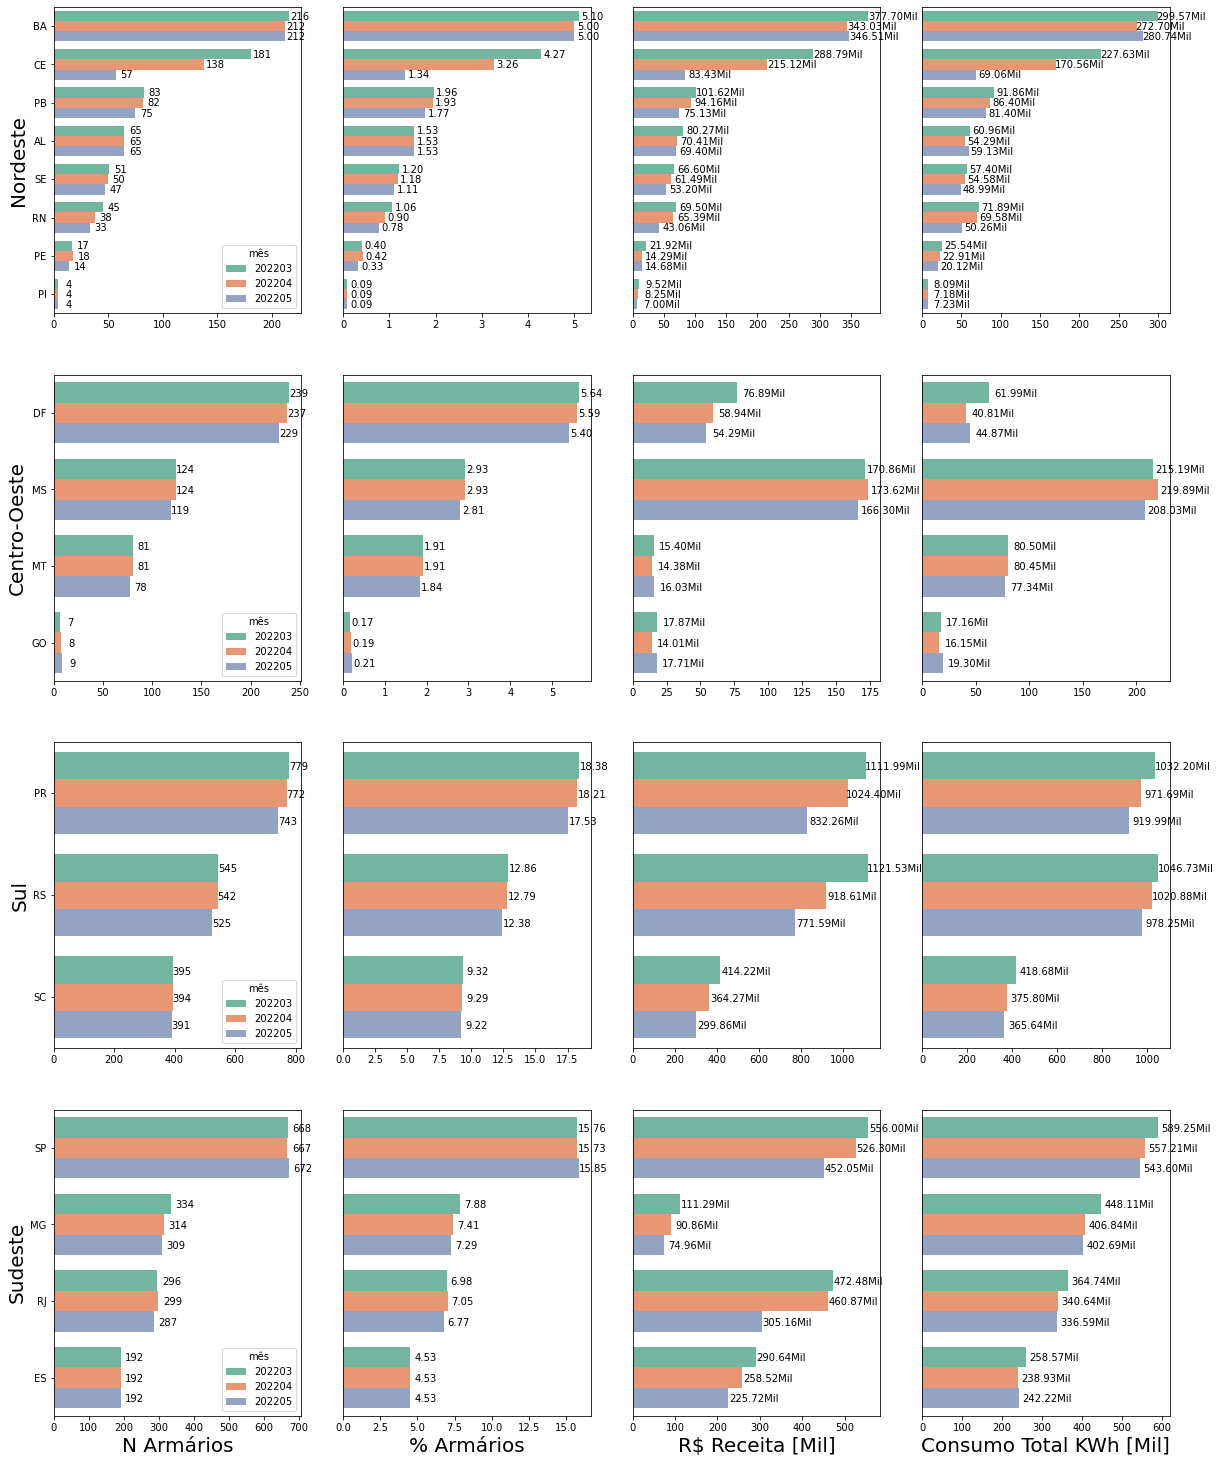

In [54]:
fig = plt.figure(figsize=(20,80))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 4)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(0.3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 8)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1.2+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    

    
#### Fig C
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 12)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=(df['contagem']/total)*100, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(1+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("% Armários")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig C
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(60+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Receita [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 16)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(70+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}Mil'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax


plt.show()

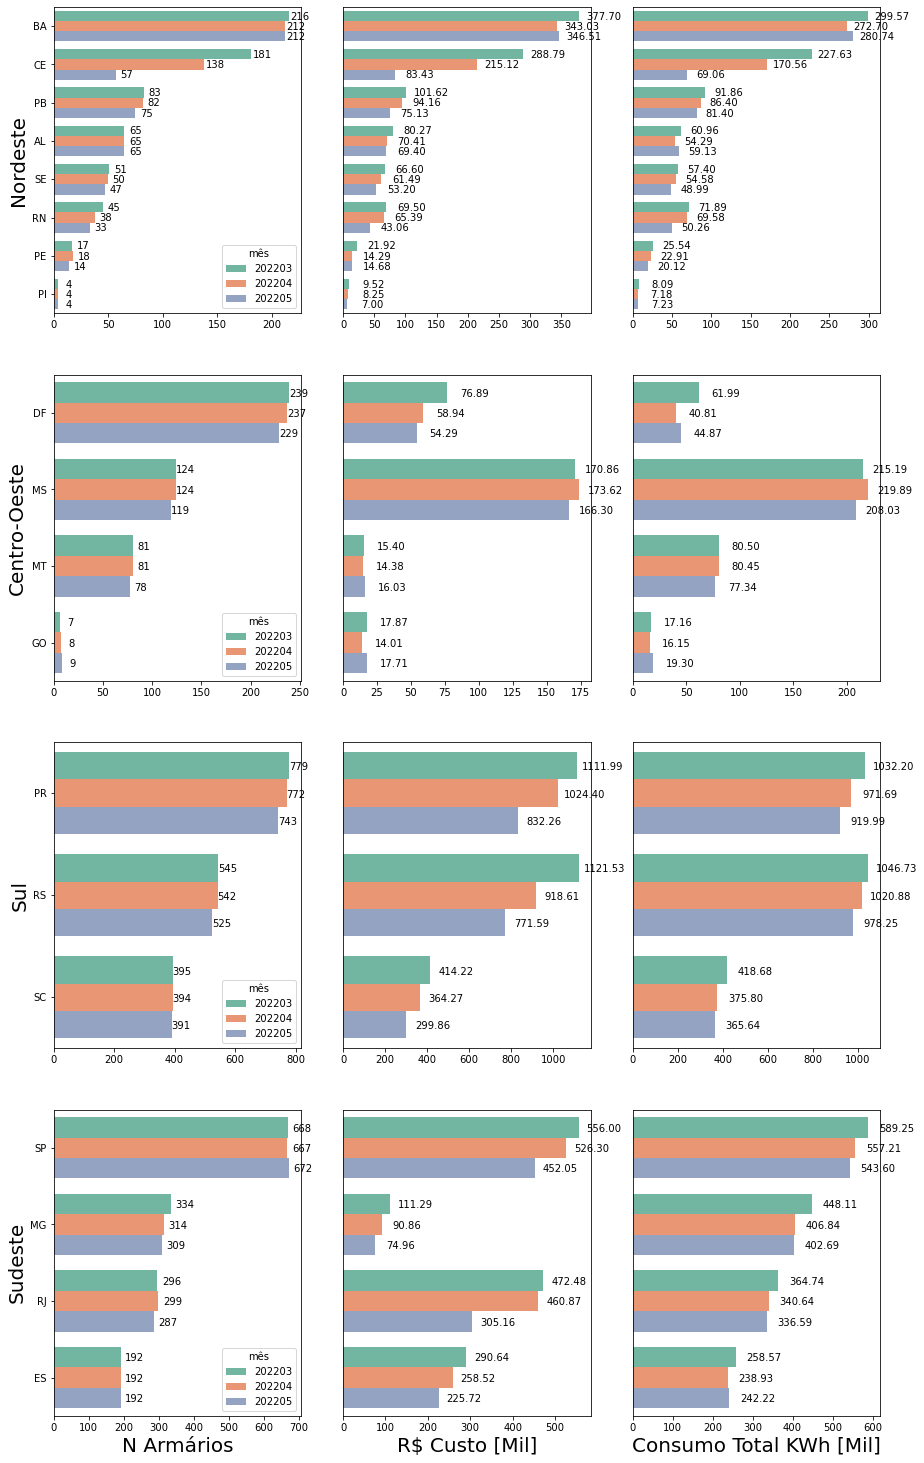

In [58]:
fig = plt.figure(figsize=(20,80))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 4, 1)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)



#### Fig C
plot = plt.subplot(12, 4, 2)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 3)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'NE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 4, 5)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 6)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 7)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'CO'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(25+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 4, 9)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(30+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

    
#### Fig C
plot = plt.subplot(12, 4, 10)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 11)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'S'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(125+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
ax.get_yaxis().set_visible(False)
leg = plt.legend()

ax.get_legend().set_visible(False)    
    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 4, 13)

ax = sns.barplot(
    x='contagem', 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(40+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.0f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("N Armários")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)


#### Fig C
plot = plt.subplot(12, 4, 14)

ax = sns.barplot(
    x=df['faturado']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(60+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("R$ Custo [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Fig D
plot = plt.subplot(12, 4, 15)

ax = sns.barplot(
    x=df['consumo']/1000, 
    y='uf', hue = 'mês', 
    data=df.loc[df['Macroregiao'] == 'SE'].sort_values(by='contagem', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(70+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Consumo Total KWh [Mil]")
ax.get_yaxis().set_visible(False)
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax


plt.show()

In [85]:
df_media = pd.DataFrame()

df_media['media_faturamento'] = df['faturado']/df['contagem']
df_media['media_consumo'] = df['consumo']/df['contagem']
df_media['uf'] = df['uf']
df_media['Macroregiao'] = df['Macroregiao']
df_media['mês'] = df['mês']
df_media['contagem'] = df['contagem']

df_media

,media_faturamento,media_consumo,uf,Macroregiao,mês,contagem
0,1967.723333,2144.892222,GO,CO,202205,9
1,205.571538,991.525641,MT,CO,202205,78
2,1397.457311,1748.129328,MS,CO,202205,119
3,237.062096,195.943231,DF,CO,202205,229
4,2063.190000,1776.000000,AM,N,202205,1
5,1750.242500,1806.750000,PI,NE,202205,4
6,1048.906429,1437.142857,PE,NE,202205,14
7,1304.877576,1522.966667,RN,NE,202205,33
8,1131.954043,1042.404255,SE,NE,202205,47
9,1463.653509,1211.649123,CE,NE,202205,57


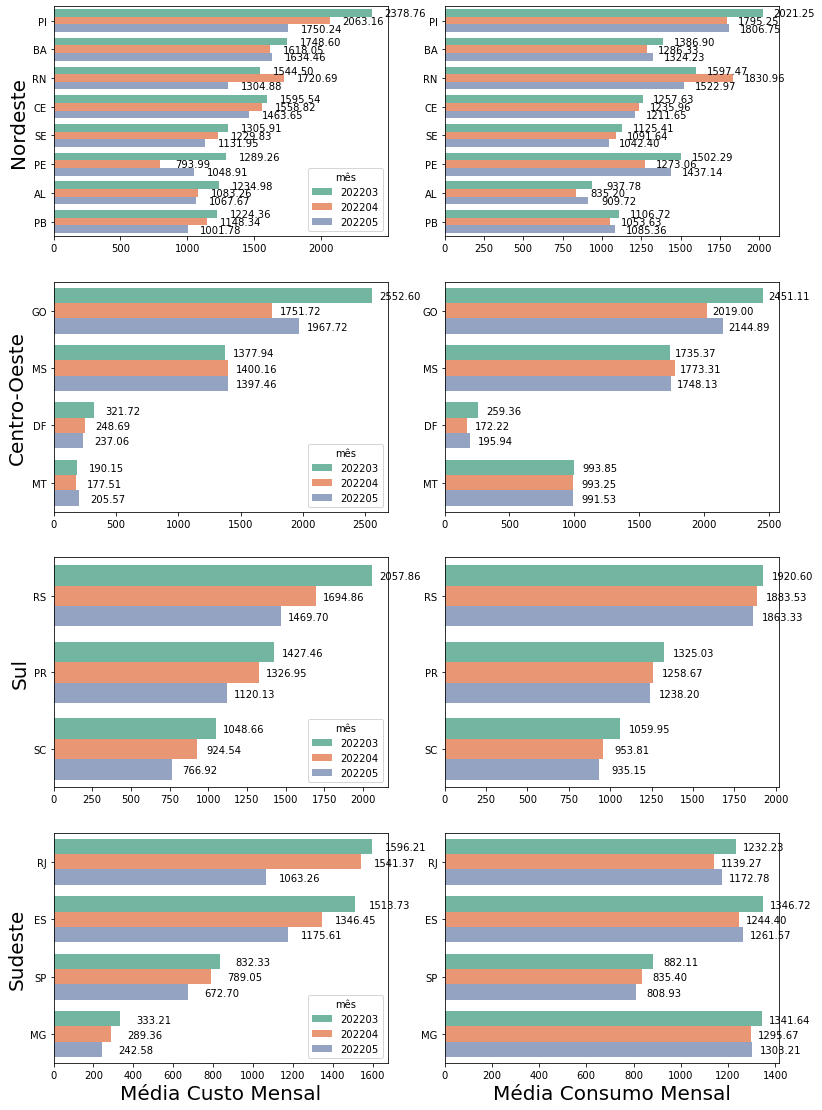

In [61]:
fig = plt.figure(figsize=(20,60))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='media_faturamento', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'NE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'NE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)


#### Centro-Oeste 

#### Fig A
plot = plt.subplot(12, 3, 4)

ax = sns.barplot(
    x='media_faturamento', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'CO'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(230+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Centro-Oeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 5)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'CO'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)

#### Sul

#### Fig A
plot = plt.subplot(12, 3, 7)

ax = sns.barplot(
    x='media_faturamento', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'S'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(180+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sul")
plt.xlabel("")
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 8)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'S'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(180+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)    

#### Sudeste

#### Fig A
plot = plt.subplot(12, 3, 10)

ax = sns.barplot(
    x='media_faturamento', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'SE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(170+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Sudeste")
plt.xlabel("Média Custo Mensal")
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 11)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'SE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(120+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("Média Consumo Mensal")
ax.xaxis.label.set_size(20)
leg = plt.legend()

ax.get_legend().set_visible(False)

del ax

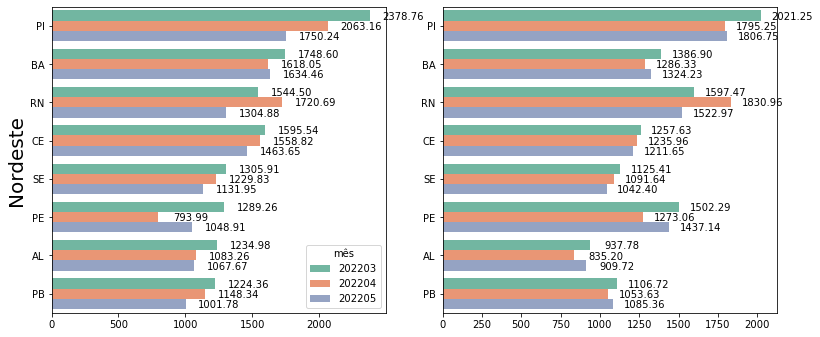

In [65]:
fig = plt.figure(figsize=(20,80))
plt.subplots_adjust(wspace=0.17)


#### Nordeste 

#### Fig A
plot = plt.subplot(12, 3, 1)

ax = sns.barplot(
    x='media_faturamento', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'NE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(250+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("Nordeste")
plt.xlabel("")

ax.yaxis.label.set_size(20)

#### Fig B
plot = plt.subplot(12, 3, 2)

ax = sns.barplot(
    x='media_consumo', 
    y='uf', hue = 'mês', 
    data=df_media.loc[df_media['Macroregiao'] == 'NE'].sort_values(by='media_faturamento', ascending=False),
    palette='Set2', orient='h'
)

for p in ax.patches:
    width = p.get_width()
    plt.text(200+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:.2f}'.format(width),
             ha='center', va='center')

plt.grid(False)
plt.ylabel("")
plt.xlabel("")
leg = plt.legend()

ax.get_legend().set_visible(False)

In [66]:
df_media

,media_faturamento,media_consumo,uf,Macroregiao,mês
0,1967.723333,2144.892222,GO,CO,202205
1,205.571538,991.525641,MT,CO,202205
2,1397.457311,1748.129328,MS,CO,202205
3,237.062096,195.943231,DF,CO,202205
4,2063.190000,1776.000000,AM,N,202205
5,1750.242500,1806.750000,PI,NE,202205
6,1048.906429,1437.142857,PE,NE,202205
7,1304.877576,1522.966667,RN,NE,202205
8,1131.954043,1042.404255,SE,NE,202205
9,1463.653509,1211.649123,CE,NE,202205


<Figure size 432x288 with 0 Axes>

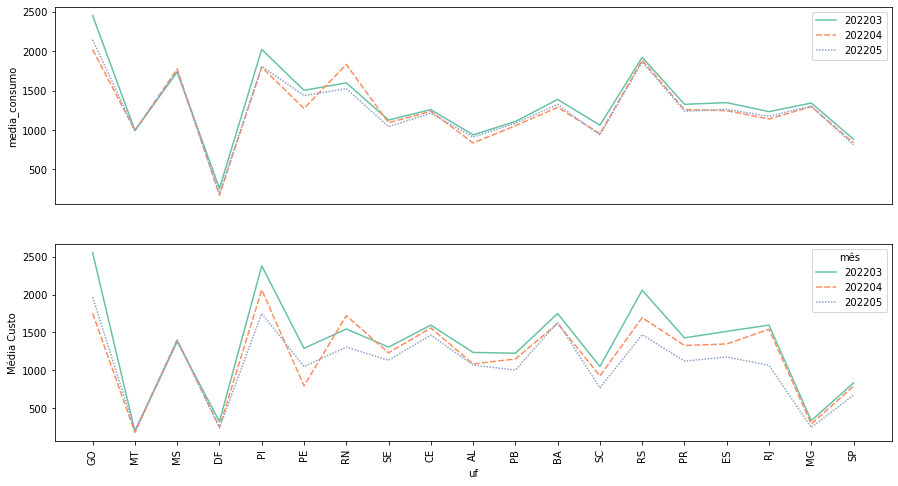

In [89]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(2, 1, 1)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df_media.loc[df_media['Macroregiao']!='N'], x="uf", y="media_consumo", hue="mês", style="mês", palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(2, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df_media.loc[df_media['Macroregiao']!='N'], x="uf", y="media_faturamento", hue="mês", style="mês", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Média Custo")
plt.show()

In [175]:
consumo_macroregioes = pd.read_csv(PATH + 'consumo_macroregioes.txt', sep = '\t')
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].astype('string')
consumo_macroregioes.dtypes

consumo        float64
mes             string
macroregiao     object
dtype: object

In [176]:
estados_armarios['consumo'].loc[estados_armarios['Macroregiao'] == 'NE'].sum()

616932.9

In [177]:
consumo_macroregioes

,consumo,mes,macroregiao
0,704764.83,201701,NE
1,3111179.00,201701,S
2,1123905.39,201701,CO
3,36595.00,201701,N
4,2308324.93,201701,SE
...,...,...,...
330,1812.00,202207,N
331,86564.00,202207,NE
332,389648.80,202207,SE
333,110532.37,202207,CO


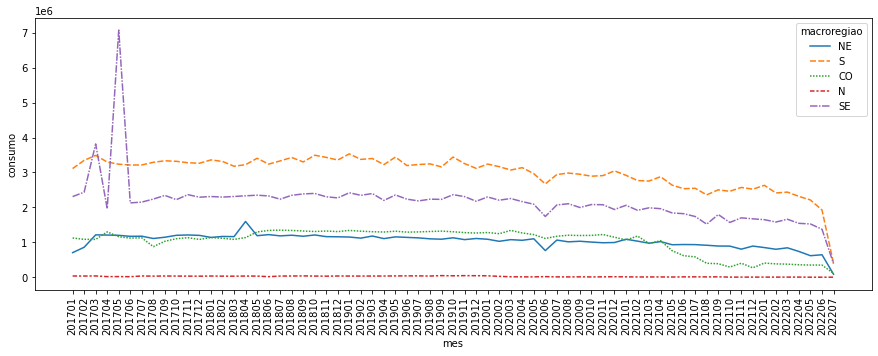

In [178]:
fig = plt.figure(figsize=(15,5))

sns.lineplot(data=consumo_macroregioes, x="mes", y="consumo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.show()

In [4]:
consumo_macroregioes = pd.read_csv(PATH + 'consumo_macroregioes_removido_faturas_problematicas.txt', sep = '\t')
consumo_macroregioes['mes'] = consumo_macroregioes['mes'].astype('string')
consumo_macroregioes.dtypes

consumo        float64
mes             string
macroregiao     object
dtype: object

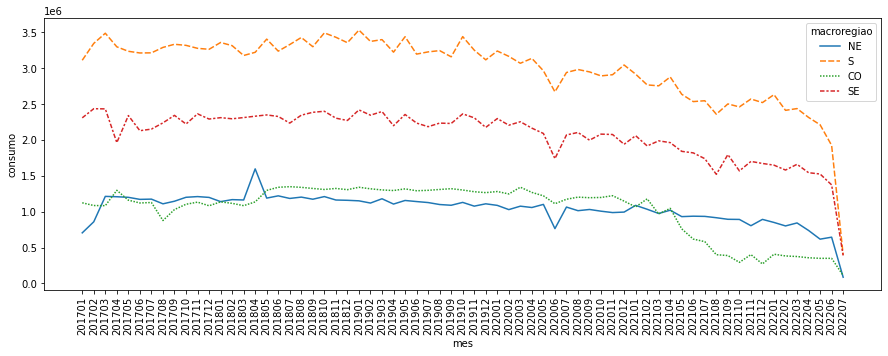

In [5]:
fig = plt.figure(figsize=(15,5))

sns.lineplot(data=consumo_macroregioes.loc[consumo_macroregioes['macroregiao']!='N'], x="mes", y="consumo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.show()

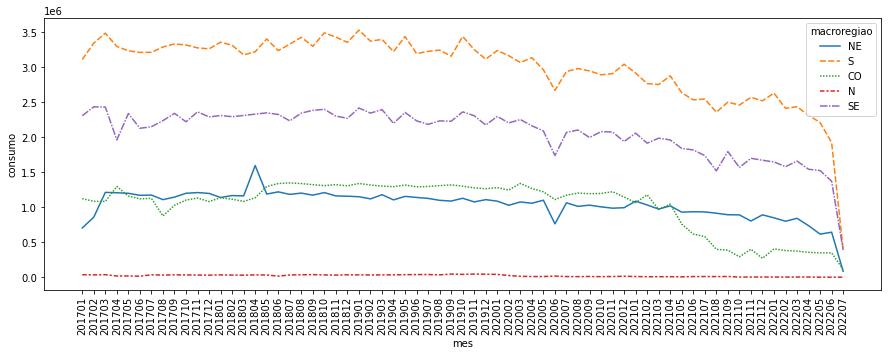

In [180]:
fig = plt.figure(figsize=(15,5))

sns.lineplot(data=consumo_macroregioes, x="mes", y="consumo", hue="macroregiao", style="macroregiao")
plt.xticks(rotation=90)
plt.show()

In [3]:
df = pd.read_csv(PATH + 'mediana_consumo_estados_trimestral.txt', sep = '\t')
df

,mes,macroregiao,uf,mediana_consumo,mediana_custo
0,202205,CO,GO,677.0,661.0
1,202205,CO,MS,876.0,1068.0
2,202205,CO,DF,124.0,155.0
3,202205,CO,MT,959.0,152.0
4,202205,NE,AL,815.0,974.0
5,202205,NE,BA,1174.5,1486.0
6,202205,NE,CE,1202.5,1509.0
7,202205,NE,PI,1842.0,1793.5
8,202205,NE,RN,580.0,591.0
9,202205,NE,SE,1020.0,1113.0


<Figure size 432x288 with 0 Axes>

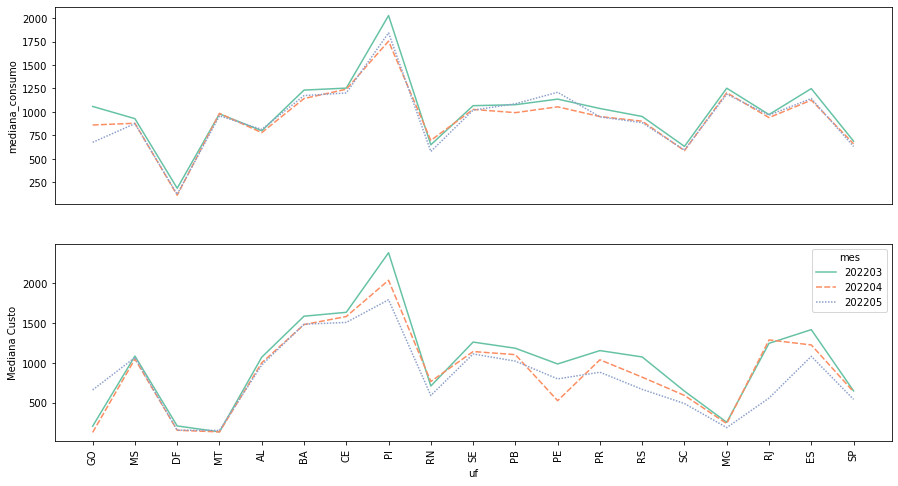

In [4]:
plt.subplots_adjust(wspace=0.17)
fig = plt.figure(figsize=(15,8))

#### Nordeste 

#### Fig A
plot = plt.subplot(2, 1, 1)
#fig = plt.figure(figsize=(15,5))

ax = sns.lineplot(data=df.loc[df['macroregiao']!='N'], x="uf", y="mediana_consumo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.xlabel("")
plt.xticks("")
#plt.show()
leg = plt.legend()

ax.get_legend().set_visible(False)

plot = plt.subplot(2, 1, 2)
#fig = plt.figure(figsize=(15,5))

sns.lineplot(data=df.loc[df['macroregiao']!='N'], x="uf", y="mediana_custo", hue="mes", style="mes", palette="Set2")

plt.xticks(rotation=90)
plt.ylabel("Mediana Custo")
plt.show()

In [14]:
armarios_co = pd.read_csv(PATH + 'contagem_produtos_porarmario.txt', sep = '\t')
mapeamento_armario = pd.read_csv(PATH + 'mapeamento_armario_sigla.txt', sep = '\t')
lista_co = 'MT', 'MS', 'GO', 'DF'
co = armarios_co.merge(mapeamento_armario.query('UF in @lista_co'), on= 'ARMARIO')
co

,ARMARIO,STATUS_ARMARIO,BL,LN,TV,Total Geral,UF,UF_SIGLA
0,DFBSA_O1A01,ATIVO,89,262,0,351,DF,DFG98
1,DFBSA_O1A02,ATIVO,139,259,6,404,DF,DFG99
2,DFBSA_O1A0Q,ATIVO,80,105,1,186,DF,DFQ03
3,DFBSA_O1A0S,ATIVO,156,191,31,378,DF,DFQ04
4,DFBSA_O1A0U,ATIVO,12,28,1,41,DF,DFQ06
...,...,...,...,...,...,...,...,...
645,MTVAZ_O1B04,ATIVO,101,139,0,240,MT,MTG26
646,MTVAZ_O1B05,ATIVO,27,74,0,101,MT,MTG18
647,MTVAZ_O1B06,ATIVO,102,107,0,209,MT,MTG27
648,MTVAZ_O1B07,ATIVO,121,141,0,262,MT,MTG21


In [19]:
co.groupby('UF')['BL', 'LN', 'TV'].sum()

C:\Users\TALMEI~1\AppData\Local\Temp/ipykernel_21032/1844590496.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  co.groupby('UF')['BL', 'LN', 'TV'].sum()


,BL,LN,TV
UF,,,
DF,34214,45495,3870
GO,37336,51905,3315
MS,15232,19493,820
MT,7654,11649,0
